# Introduction

In this section we will set the paths and load the data. We will explain about the data structure and do a few sanity checks.

Import the required modules:

In [1]:
import os
import numpy as np
import mne

# Loading the data

Loading the data. The MEGIN data are stored in the FIF format which is a binary format with embedded labels.

As a first step set the path to the data. Note this will dependent on where you have stored the data set. After set the file name.

In [12]:
data_path = r'D:\CogitateExp1\SA109' 

file_name = ['SA109_run1.fif','SA109_run2.fif','SA109_run3.fif','SA109_run4.fif','SA109_run5.fif']

Since there is a limit to the file size of the FIF files, they are broken into 5 sub-files.

Start by reading the first file:

In [3]:
path_data = os.path.join(data_path,file_name[0]) 
data1 = mne.io.read_raw_fif(path_data)

Opening raw data file D:\CogitateExp1\SA109\SA109_run1.fif...


<ipython-input-3-fb6002b88685>:2: RuntimeWarning: This filename (D:\CogitateExp1\SA109\SA109_run1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  data1 = mne.io.read_raw_fif(path_data)


    Read a total of 8 projection items:
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
    Range : 19000 ... 860999 =     19.000 ...   860.999 secs
Ready.


To get some basic information from the FIF file write

In [4]:
print(data1)

<Raw | SA109_run1.fif, 405 x 842000 (842.0 s), ~5.4 MB, data not loaded>


The 5.4 MB refer to the size of the data set. The time 842 s is recording time. As teh sampling rate was 1000 Hz this results in 842000 samples recorded in 405 channels. These channels include the MEG, EEG, triggers channels etc.

To get some additional information:

In [5]:
print(data1.info)

<Info | 24 non-empty values
 acq_pars: ACQactiveGround 1 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG001, EOG002, ECG003, EEG001, EEG002, EEG003, EEG004, EEG005, ...
 chs: 2 EOG, 1 ECG, 64 EEG, 11 IAS, 102 MAG, 204 GRAD, 5 MISC, 15 STIM, 1 SYST
 custom_ref_applied: False
 description: TRIUX system at Birmingham-3140
 dev_head_t: MEG device -> head transform
 dig: 266 items (3 Cardinal, 4 HPI, 65 EEG, 194 Extra)
 events: 1 item (list)
 experimenter: meguser (meguser)
 file_id: 4 items (dict)
 gantry_angle: 68.0
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 2020-11-12 15:02:19 UTC
 meas_id: 4 items (dict)
 nchan: 405
 proj_id: 1 item (ndarray)
 proj_name: cogitate
 projs: generated with autossp-1.2.0: off, generated with autossp-1.2.0: ...
 sfreq: 1000.0 Hz
 subject_info: 6 items (dict)
>


This set of parameters contains information about some of the important parameters of the data set. For instance the gantry angle was 68 degress (*gantry_angle*) and sampling frequency was 1000 Hz (*sfreq*). The data were lowpass filtered at 330.0 Hz (*lowpass*) prior to the digital sampling.

**Question 1:** What is the purpose of the 330 Hz lowpas-filter (hint: see Analog Filters for Data Conversion, Chapter 3; Smith et al., 1999

**Question 2:** What is the purpose of 0.1 Hz highpass-filter?

The data object allow for a simple inspection of the data by plotting the spectra:

Effective window size : 2.048 (s)
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


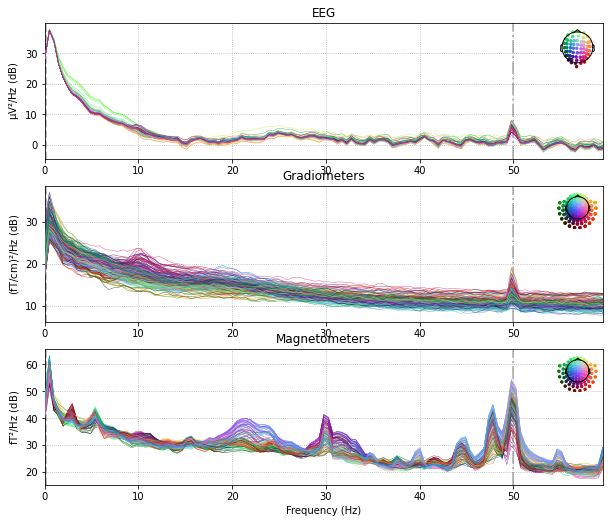

In [10]:
data1.plot_psd(fmax=60);

Note the 10 Hz alpha activity on the gradiometers as well as the 50 Hz line noise. The frequency of the line noise is 50 Hz in European countries including Russia whereas it is 60 in South Korea as well as South and North America. In Japan it can be either 50 or 60 Hz depending on the region.

**Question 3:** Why is the line-noise 50 Hz larger for the magnetometers than the gradiometers?

To view the raw data use

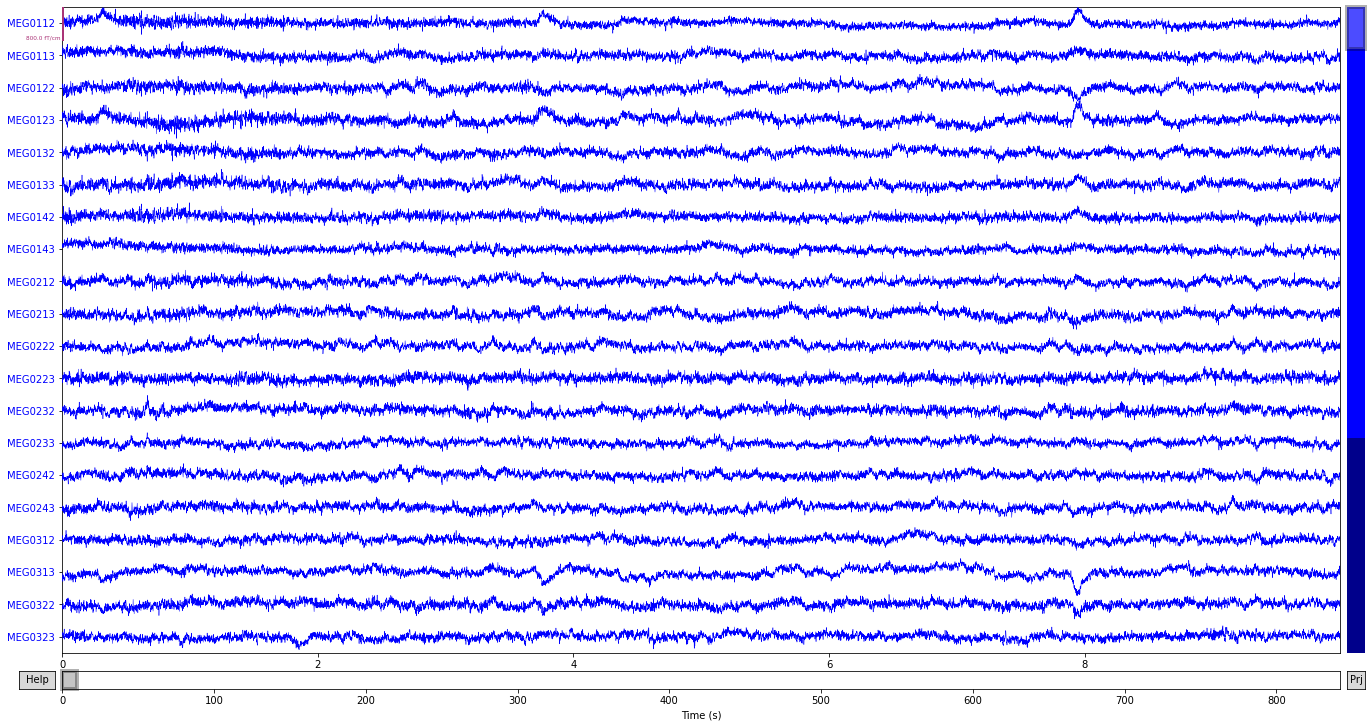

In [11]:
data1.pick(['meg']).plot(duration=10,title='Raw');

**Question 3:** Scroll through the data and identify the following artifacts (include figures in the response):

- Eye-blink
- A muscle contraction (characterized by high-frequency activity

## References
Smith, W.S. (1997) The Scientist and Engineer's Guide to Digital Signal Processing. California Technical Publishing. ISBN 0-9660176-3-3 [Online version](http://www.dspguide.com/)